In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing 

In [13]:
df = fetch_california_housing(as_frame=True)
df.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = df.frame.pop('MedHouseVal')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.frame, y, test_size=0.25, random_state=42)

In [18]:
df.frame.shape

(20640, 8)

In [19]:
y.shape

(20640,)

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
model1 = keras.Sequential()
model1.add(keras.Input(8,))
model1.add(layers.Dense(30, activation= 'relu'))
model1.add(layers.Dense(1, activation= 'linear'))

model1.compile(loss = "mean_squared_error",optimizer = "adam",metrics = keras.metrics.RootMeanSquaredError())


history = model1.fit(X_train,y_train,batch_size = 32, epochs = 20, validation_split = 0.1)

Epoch 1/20
436/436 [==============================] - 2s 3ms/step - loss: 1.5435 - root_mean_squared_error: 1.2424 - val_loss: 0.6549 - val_root_mean_squared_error: 0.8092
Epoch 2/20
436/436 [==============================] - 1s 2ms/step - loss: 0.5676 - root_mean_squared_error: 0.7534 - val_loss: 0.5077 - val_root_mean_squared_error: 0.7125
Epoch 3/20
436/436 [==============================] - 1s 2ms/step - loss: 0.4614 - root_mean_squared_error: 0.6792 - val_loss: 0.4574 - val_root_mean_squared_error: 0.6763
Epoch 4/20
436/436 [==============================] - 1s 2ms/step - loss: 0.4214 - root_mean_squared_error: 0.6492 - val_loss: 0.4341 - val_root_mean_squared_error: 0.6588
Epoch 5/20
436/436 [==============================] - 1s 2ms/step - loss: 0.4096 - root_mean_squared_error: 0.6400 - val_loss: 0.4265 - val_root_mean_squared_error: 0.6531
Epoch 6/20
436/436 [==============================] - 1s 2ms/step - loss: 0.3984 - root_mean_squared_error: 0.6312 - val_loss: 0.4216 - val_

In [27]:
X_trainB = X_train[:, 0:5]
X_trainA = X_train[:, 2:8]

In [29]:
inputA = keras.Input(
    shape=(6,), name="inputA"
) 
x = layers.Dense(30, activation="relu")(inputA)
blockA = layers.Dense(30, activation="relu")(x)


inputB = keras.Input(shape=(5,), name="inputB")

conc = layers.concatenate([blockA, inputB])
out = layers.Dense(1, name="output")(conc)

model2 = keras.Model(inputs=[inputA, inputB],
    outputs=[out])

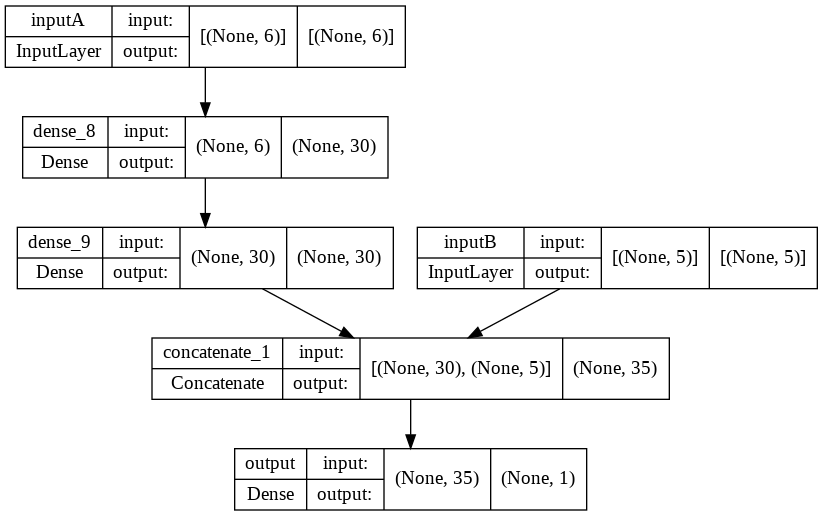

In [30]:
keras.utils.plot_model(model2, "mymodel.png", show_shapes=True, show_layer_names=True)

In [40]:
model2.compile(
    optimizer="adam",
    loss= "mean_squared_error", metrics = keras.metrics.RootMeanSquaredError())

history = model2.fit({"inputA" : X_trainB, "inputB" : X_trainA}, y_train, batch_size = 32, epochs = 20, validation_split = 0.1)

Epoch 1/20
436/436 [==============================] - 2s 4ms/step - loss: 1.1185 - root_mean_squared_error: 1.0576 - val_loss: 0.5519 - val_root_mean_squared_error: 0.7429
Epoch 2/20
436/436 [==============================] - 1s 2ms/step - loss: 0.4609 - root_mean_squared_error: 0.6789 - val_loss: 0.4591 - val_root_mean_squared_error: 0.6776
Epoch 3/20
436/436 [==============================] - 1s 2ms/step - loss: 0.4156 - root_mean_squared_error: 0.6447 - val_loss: 0.4372 - val_root_mean_squared_error: 0.6612
Epoch 4/20
436/436 [==============================] - 1s 2ms/step - loss: 0.3999 - root_mean_squared_error: 0.6324 - val_loss: 0.4187 - val_root_mean_squared_error: 0.6471
Epoch 5/20
436/436 [==============================] - 1s 2ms/step - loss: 0.3889 - root_mean_squared_error: 0.6236 - val_loss: 0.4106 - val_root_mean_squared_error: 0.6408
Epoch 6/20
436/436 [==============================] - 1s 2ms/step - loss: 0.3746 - root_mean_squared_error: 0.6121 - val_loss: 0.3943 - val_